# Cat vs. Dog Image Classification
## Transfer Learning
1. Create a base model using one of the built-in pretrained ImageNet models without its final dense layers
2. Define a set of new dense layers for classification and create a new model by combining the base model and the top model
3. “Freeze” the layers of the base model. That is, the weights of the layers in the base model will not be trained
4. Train the resulting new model with our new categories.

In [1]:
# %load "g:/My Drive/data_augmentation.py"
import os

base_dir = '../../..//cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                  width_shift_range=.2,
                                  height_shift_range=.2,
                                   shear_range=.2,
                                  horizontal_flip=True,
                                  zoom_range=.2)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 20,
                                                   class_mode="binary")

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size = 200,
                                                   class_mode="binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### VGG16 
* ImageNet trained weights


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

### Definiujemy model pod nasz problem

In [ ]:
from tensorflow import keras
base_model=VGG16(include_top=False, input_tensor=keras.layers.Input(shape=(150,150,3)))
#include_top=MLP False - wylaczamy ja






In [ ]:
base_model.summary()

In [42]:
x=base_model.output
x=keras.layers.GlobalAveragePooling2D()(x)#alternatywa dla Flatten
x=keras.layers.Dense(512,activation='relu')(x)
prediction=keras.layers.Dense(1,activation='sigmoid')(x)

In [43]:
model=keras.Model(base_model.input, prediction)

In [44]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [45]:
#zamrazamy to czego nie chcemy sie uczyc

In [46]:
base_model.layers[2].trainable 

True

In [47]:
for layer in base_model.layers:
    layer.trainable=False

In [48]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [49]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])

In [50]:
history=model.fit(train_generator, epochs=15, validation_data=test_generator, workers=4)

Epoch 1/15
100/100 [==============================] - 23s 215ms/step - loss: 0.5651 - acc: 0.7005 - val_loss: 0.3751 - val_acc: 0.8240
Epoch 2/15
100/100 [==============================] - 11s 101ms/step - loss: 0.4398 - acc: 0.7965 - val_loss: 0.3179 - val_acc: 0.8540
Epoch 3/15
100/100 [==============================] - 11s 102ms/step - loss: 0.4026 - acc: 0.8120 - val_loss: 0.2969 - val_acc: 0.8670
Epoch 4/15
100/100 [==============================] - 10s 94ms/step - loss: 0.3973 - acc: 0.8175 - val_loss: 0.3626 - val_acc: 0.8230
Epoch 5/15
100/100 [==============================] - 10s 94ms/step - loss: 0.3636 - acc: 0.8385 - val_loss: 0.3171 - val_acc: 0.8610
Epoch 6/15
100/100 [==============================] - 10s 94ms/step - loss: 0.3790 - acc: 0.8370 - val_loss: 0.3345 - val_acc: 0.8540
Epoch 7/15
100/100 [==============================] - 10s 94ms/step - loss: 0.3575 - acc: 0.8350 - val_loss: 0.2799 - val_acc: 0.8680
Epoch 8/15
100/100 [==============================] - 10s 9

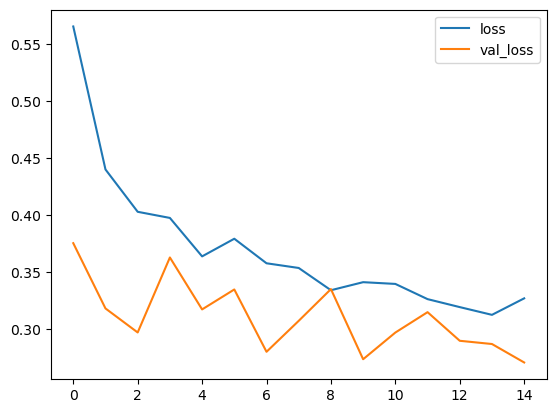

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss']);


## Further Improving Accuracy with Fine-Tuning
One way to increase performance even further is to "fine-tune" the weights of the top layers of the pretrained model alongside the training of the top-level classifier. A couple of important notes on fine-tuning:

- **Fine-tuning should only be attempted *after* you have trained the top-level classifier with the pretrained model set to non-trainable**. If you add a randomly initialized classifier on top of a pretrained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier), and your pretrained model will just forget everything it has learned.
- Additionally, we **fine-tune only the *top layers* of the pre-trained model** rather than all layers of the pretrained model because, in a convnet, the higher up a layer is, the more specialized it is. The first few layers in a convnet learn very simple and generic features, which generalize to almost all types of images. But as you go higher up, the features are increasingly specific to the dataset that the model is trained on. The goal of fine-tuning is to adapt these specialized features to work with the new dataset.

![](img/fine_tune.png)


In [52]:
for i, layer in enumerate(base_model.layers):
    print(i,layer.name)

0 input_4
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [53]:
for layer in model.layers[:15]:
    layer.trainable=False
for layer in model.layers[15:]:
    layer.trainable=True

In [54]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [55]:
base_model=VGG16(include_top=False, input_tensor=keras.layers.Input(shape=(150,150,3)))
x=base_model.output
x=keras.layers.GlobalAveragePooling2D()(x)#alternatywa dla Flatten
x=keras.layers.Dense(512,activation='relu')(x)
prediction=keras.layers.Dense(1,activation='sigmoid')(x)


In [56]:
model=keras.Model(base_model.input,prediction)

In [57]:
for i,layer in enumerate(base_model.layers):
    print(i,layer.name)

0 input_5
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [58]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.001,
                                             momentum=.9),
                                             loss='binary_crossentropy',
                                              metrics=['acc'])

In [64]:
history=model.fit(train_generator,epochs=10,validation_data=test_generator,workers=4)

Epoch 1/10
 72/100 [====================>.........] - ETA: 3s - loss: 0.7004 - acc: 0.4632

KeyboardInterrupt: 

### Inception

In [65]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model=InceptionV3()

You can see that we reach a validation accuracy of 88–90% very quickly. This is much better than the small model we trained from scratch.

In [79]:
for i, layer in enumerate(base_model.layers):
    print(i,layer.name)

0 input_10
1 conv2d_376
2 batch_normalization_376
3 activation_376
4 conv2d_377
5 batch_normalization_377
6 activation_377
7 conv2d_378
8 batch_normalization_378
9 activation_378
10 max_pooling2d_16
11 conv2d_379
12 batch_normalization_379
13 activation_379
14 conv2d_380
15 batch_normalization_380
16 activation_380
17 max_pooling2d_17
18 conv2d_384
19 batch_normalization_384
20 activation_384
21 conv2d_382
22 conv2d_385
23 batch_normalization_382
24 batch_normalization_385
25 activation_382
26 activation_385
27 average_pooling2d_36
28 conv2d_381
29 conv2d_383
30 conv2d_386
31 conv2d_387
32 batch_normalization_381
33 batch_normalization_383
34 batch_normalization_386
35 batch_normalization_387
36 activation_381
37 activation_383
38 activation_386
39 activation_387
40 mixed0
41 conv2d_391
42 batch_normalization_391
43 activation_391
44 conv2d_389
45 conv2d_392
46 batch_normalization_389
47 batch_normalization_392
48 activation_389
49 activation_392
50 average_pooling2d_37
51 conv2d_388
5

In [80]:
for layer in base_model.layers[:279]:
    layer.trainable=False
for layer in base_model.layers[279:]:
    layer.trainable=True

In [81]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 74, 74, 32)   864         ['input_10[0][0]']               
                                                                                                  
 batch_normalization_376 (Batch  (None, 74, 74, 32)  96          ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                       

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_386 (Batch  (None, 16, 16, 96)  288         ['conv2d_386[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_387 (Batch  (None, 16, 16, 32)  96          ['conv2d_387[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_381 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_381[0][0]']
                                                                                                  
 activatio

 activation_398 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_398[0][0]']
                                                                                                  
 conv2d_396 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_399 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_398[0][0]']         
                                                                                                  
 batch_normalization_396 (Batch  (None, 16, 16, 48)  144         ['conv2d_396[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_399 (Batch  (None, 16, 16, 96)  288         ['conv2d_399[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_402[0][0]',         
                                                                  'activation_405[0][0]',         
                                                                  'max_pooling2d_18[0][0]']       
                                                                                                  
 conv2d_410 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_410 (Batch  (None, 7, 7, 128)   384         ['conv2d_410[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_410 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_410[0][0]']
          

                                                                                                  
 batch_normalization_420 (Batch  (None, 7, 7, 160)   480         ['conv2d_420[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_420 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_420[0][0]']
                                                                                                  
 conv2d_421 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_420[0][0]']         
                                                                                                  
 batch_normalization_421 (Batch  (None, 7, 7, 160)   480         ['conv2d_421[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_431 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_430[0][0]']         
                                                                                                  
 batch_normalization_431 (Batch  (None, 7, 7, 160)   480         ['conv2d_431[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_431 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_431[0][0]']
                                                                                                  
 conv2d_427 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_43

                                                                                                  
 activation_441 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_441[0][0]']
                                                                                                  
 conv2d_437 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_442 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_441[0][0]']         
                                                                                                  
 batch_normalization_437 (Batch  (None, 7, 7, 192)   576         ['conv2d_437[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 conv2d_450 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_449[0][0]']         
                                                                                                  
 batch_normalization_446 (Batch  (None, 7, 7, 192)   576         ['conv2d_446[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_450 (Batch  (None, 7, 7, 192)   576         ['conv2d_450[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_446 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_446[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_454 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_454[0][0]']
                                                                                                  
 activation_455 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_455[0][0]']
                                                                                                  
 activation_458 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_458[0][0]']
                                                                                                  
 activation_459 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_459[0][0]']
                                                                                                  
 batch_normalization_460 (Batch  (None, 3, 3, 192)   576         ['conv2d_460[0][0]']             
 Normaliza

                                                                                                  
 activation_468 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_468[0][0]']
                                                                                                  
 batch_normalization_469 (Batch  (None, 3, 3, 192)   576         ['conv2d_469[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_461 (Activation)    (None, 3, 3, 320)    0           ['batch_normalization_461[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_463[0][0]',         
                                                                  'activation_464[0][0]']         
          

In [89]:
base_model=InceptionV3(include_top=False, input_tensor=keras.layers.Input(shape=(150,150,3)))
#include_top=MLP False - wylaczamy ja

last_layer=base_model.get_layer('mixed7') #nowa warstwa koncowa



x=last_layer.output
x=keras.layers.GlobalAveragePooling2D()(x)#alternatywa dla Flatten
x=keras.layers.Dense(1024,activation='relu')(x)
x=keras.layers.Dropout(.2)(x)
prediction=keras.layers.Dense(1,activation='sigmoid')(x)

model=keras.Model(base_model.input,prediction)

In [83]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 74, 74, 32)   864         ['input_10[0][0]']               
                                                                                                  
 batch_normalization_376 (Batch  (None, 74, 74, 32)  96          ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_386 (Batch  (None, 16, 16, 96)  288         ['conv2d_386[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_387 (Batch  (None, 16, 16, 32)  96          ['conv2d_387[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_381 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_381[0][0]']
                                                                                                  
 activatio

 activation_398 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_398[0][0]']
                                                                                                  
 conv2d_396 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_399 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_398[0][0]']         
                                                                                                  
 batch_normalization_396 (Batch  (None, 16, 16, 48)  144         ['conv2d_396[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_399 (Batch  (None, 16, 16, 96)  288         ['conv2d_399[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_402[0][0]',         
                                                                  'activation_405[0][0]',         
                                                                  'max_pooling2d_18[0][0]']       
                                                                                                  
 conv2d_410 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_410 (Batch  (None, 7, 7, 128)   384         ['conv2d_410[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_410 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_410[0][0]']
          

                                                                                                  
 batch_normalization_420 (Batch  (None, 7, 7, 160)   480         ['conv2d_420[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_420 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_420[0][0]']
                                                                                                  
 conv2d_421 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_420[0][0]']         
                                                                                                  
 batch_normalization_421 (Batch  (None, 7, 7, 160)   480         ['conv2d_421[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_431 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_430[0][0]']         
                                                                                                  
 batch_normalization_431 (Batch  (None, 7, 7, 160)   480         ['conv2d_431[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_431 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_431[0][0]']
                                                                                                  
 conv2d_427 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_43

                                                                                                  
 activation_441 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_441[0][0]']
                                                                                                  
 conv2d_437 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_442 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_441[0][0]']         
                                                                                                  
 batch_normalization_437 (Batch  (None, 7, 7, 192)   576         ['conv2d_437[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 conv2d_450 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_449[0][0]']         
                                                                                                  
 batch_normalization_446 (Batch  (None, 7, 7, 192)   576         ['conv2d_446[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_450 (Batch  (None, 7, 7, 192)   576         ['conv2d_450[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_446 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_446[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_454 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_454[0][0]']
                                                                                                  
 activation_455 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_455[0][0]']
                                                                                                  
 activation_458 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_458[0][0]']
                                                                                                  
 activation_459 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_459[0][0]']
                                                                                                  
 batch_normalization_460 (Batch  (None, 3, 3, 192)   576         ['conv2d_460[0][0]']             
 Normaliza

                                                                                                  
 activation_468 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_468[0][0]']
                                                                                                  
 batch_normalization_469 (Batch  (None, 3, 3, 192)   576         ['conv2d_469[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_461 (Activation)    (None, 3, 3, 320)    0           ['batch_normalization_461[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_463[0][0]',         
                                                                  'activation_464[0][0]']         
          

In [90]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.001,
                                             momentum=.9),
                                             loss='binary_crossentropy',
                                              metrics=['acc'])

In [91]:
history=model.fit(train_generator,epochs=10,validation_data=test_generator,workers=4)

Epoch 1/10
100/100 [==============================] - 17s 112ms/step - loss: 0.6869 - acc: 0.5505 - val_loss: 0.6592 - val_acc: 0.6270
Epoch 2/10
100/100 [==============================] - 10s 98ms/step - loss: 0.6670 - acc: 0.6700 - val_loss: 0.6303 - val_acc: 0.6110
Epoch 3/10
100/100 [==============================] - 10s 97ms/step - loss: 0.6352 - acc: 0.7225 - val_loss: 0.5719 - val_acc: 0.8390
Epoch 4/10
100/100 [==============================] - 10s 96ms/step - loss: 0.5969 - acc: 0.7840 - val_loss: 0.5014 - val_acc: 0.8090
Epoch 5/10
100/100 [==============================] - 10s 98ms/step - loss: 0.5162 - acc: 0.8245 - val_loss: 0.4204 - val_acc: 0.8410
Epoch 6/10
100/100 [==============================] - 10s 98ms/step - loss: 0.4331 - acc: 0.8510 - val_loss: 0.3369 - val_acc: 0.8770
Epoch 7/10
100/100 [==============================] - 10s 98ms/step - loss: 0.3682 - acc: 0.8555 - val_loss: 0.2687 - val_acc: 0.9040
Epoch 8/10
100/100 [==============================] - 10s 98m

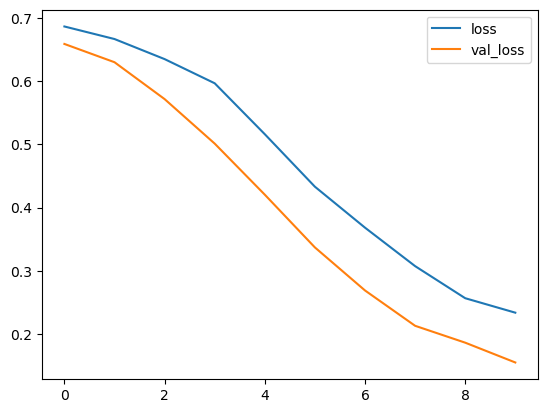

In [92]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss']);


In [93]:
model.save('models/cats_dogs')

INFO:tensorflow:Assets written to: models/cats_dogs\assets


INFO:tensorflow:Assets written to: models/cats_dogs\assets


In [95]:
moj=keras.models.load_model('models/cats_dogs/')

In [96]:
moj.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_658 (Conv2D)            (None, 74, 74, 32)   864         ['input_13[0][0]']               
                                                                                                  
 batch_normalization_658 (Batch  (None, 74, 74, 32)  96          ['conv2d_658[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_668 (Batch  (None, 16, 16, 96)  288         ['conv2d_668[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_669 (Batch  (None, 16, 16, 32)  96          ['conv2d_669[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_663 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_663[0][0]']
                                                                                                  
 activatio

 activation_680 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_680[0][0]']
                                                                                                  
 conv2d_678 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_681 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_680[0][0]']         
                                                                                                  
 batch_normalization_678 (Batch  (None, 16, 16, 48)  144         ['conv2d_678[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_681 (Batch  (None, 16, 16, 96)  288         ['conv2d_681[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_684[0][0]',         
                                                                  'activation_687[0][0]',         
                                                                  'max_pooling2d_30[0][0]']       
                                                                                                  
 conv2d_692 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_692 (Batch  (None, 7, 7, 128)   384         ['conv2d_692[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_692 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_692[0][0]']
          

                                                                                                  
 batch_normalization_702 (Batch  (None, 7, 7, 160)   480         ['conv2d_702[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_702 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_702[0][0]']
                                                                                                  
 conv2d_703 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_702[0][0]']         
                                                                                                  
 batch_normalization_703 (Batch  (None, 7, 7, 160)   480         ['conv2d_703[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_713 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_712[0][0]']         
                                                                                                  
 batch_normalization_713 (Batch  (None, 7, 7, 160)   480         ['conv2d_713[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_713 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_713[0][0]']
                                                                                                  
 conv2d_709 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_71

                                                                                                  
 activation_723 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_723[0][0]']
                                                                                                  
 conv2d_719 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_724 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_723[0][0]']         
                                                                                                  
 batch_normalization_719 (Batch  (None, 7, 7, 192)   576         ['conv2d_719[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor